In [42]:
from zgulde.ds_imports import *
import acquire

canada, mexico = acquire.get_data()

from fbprophet import Prophet

pd.plotting.register_matplotlib_converters()

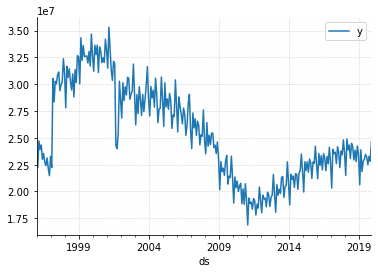

In [45]:
df = mexico.sort_values(by='date').rename(columns={'n_crossings': 'y', 'date': 'ds'}).groupby('ds').y.sum().reset_index()
df.set_index('ds').plot()

In [48]:
train = df.set_index('ds')[:'2018'].reset_index()
test = df.set_index('ds')['2019':].reset_index()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


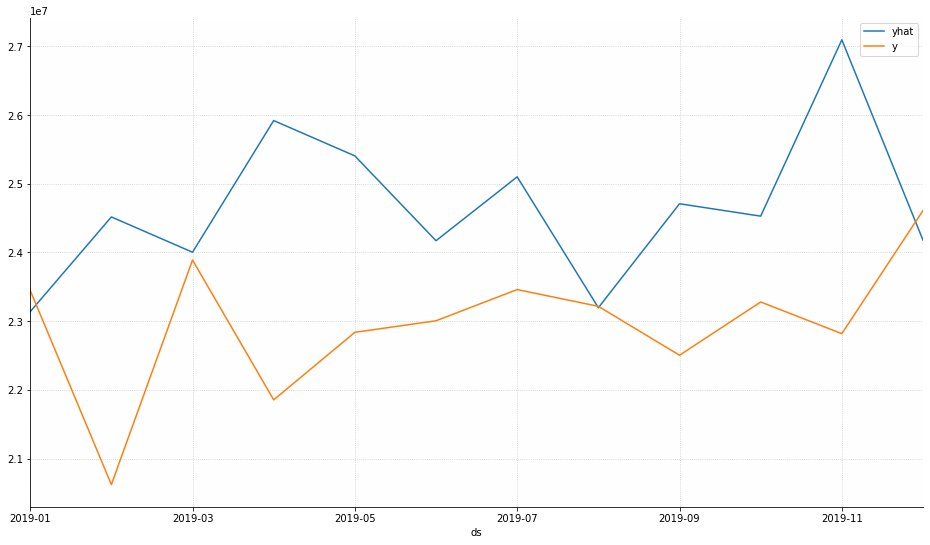

In [78]:
prophet = Prophet().fit(train)



yhat = prophet.predict(prophet.make_future_dataframe(13, freq='M'))[['ds', 'yhat']]

pd.concat([
    yhat.set_index('ds')['2019'].reset_index().assign(ds=lambda df: df.ds.dt.strftime('%Y-%m')).set_index('ds'),
    test.assign(ds=lambda df: df.ds.dt.strftime('%Y-%m')).set_index('ds')
], axis=1).plot(figsize=(16, 9))

In [89]:
future = pd.concat([
    yhat.set_index('ds')['2019'].reset_index().assign(ds=lambda df: df.ds.dt.strftime('%Y-%m')).set_index('ds'),
    test.assign(ds=lambda df: df.ds.dt.strftime('%Y-%m')).set_index('ds')
], axis=1)

rmse = math.sqrt(((future.y - future.yhat)**2).sum() / future.shape[0])

rmse

2369439.1178582213

In [90]:
# is the percentage of traffic by method consistent over time?

In [92]:
df = mexico[mexico.port_name == 'Laredo']

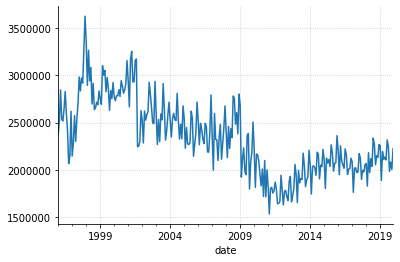

In [95]:
df.groupby('date').n_crossings.sum().plot()